<a href="https://colab.research.google.com/github/christinezuzart/DeepLearning/blob/master/ULMFit_ClassifierTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

In [8]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi 
!pip install gputil 
!pip install psutil
!pip install humanize
import psutil 
import humanize 
import os 
import GPUtil as GPU 
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0] 
def printm(): 
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss)) 
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal)) 

printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=55b67abec82eb58695591f63e2de07206be3c8b5454d4e558587ced60ecb60d2
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 156.0 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [9]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.text import *

In [0]:
# args also need to be passed
data_lm = load_data(F"/content/gdrive/My Drive/", 'tmp_lm.pkl',bs=32)

In [0]:
data_clas = (TextList.from_csv(F'/content/gdrive/My Drive/', 'df_classifier_clean.csv', cols='text', vocab=data_lm.vocab).split_from_df(col='is_valid').label_from_df(cols='label').databunch(bs=32))

In [0]:
data_clas.save('/content/gdrive/My Drive/tmp_clas.pkl')

In [0]:
# args also need to be passed
# data_clas = load_data(F"/content/gdrive/My Drive/tmp_clas.pkl')

In [15]:
data_clas.show_batch()

text,target
"xxbos "" xxmaj two and a half months ago i was prescribed xxmaj venlafaxine to help prevent chronic migraines . \r \n xxmaj it did help the migraines ( reduced them by almost half ) , but with it came a host of side effects that were far worse than the problem i was trying to get rid of . \r \n xxmaj having now come off of",Migraine
"xxbos "" i have spent a lot of time reading threads on xxmaj prozac . xxmaj they have all been very helpful during these past few months so i thought i should share my own experiences just in case anyone out there might find it helpful . i started xxmaj prozac 20 mg about 2 months ago . i always knew i had anxiety and mild depression and was always",Anxiety and Stress
"xxbos "" ( a little background on my skin , i get a pimple here and there and overall have pretty normal skin ) \r \n \r \n i saw a commercial for xxmaj differin and immediately went online to buy it , i thought that the product sounded great for the price ! xxmaj after i purchased it i started looking into side effects and reviews on the",Acne
"xxbos "" i ’ve been taking xxmaj contrave for 5 days . i noticed a change in my appetite on the first day . i was definitely less hungry . xxmaj on the 2nd day , i felt great . i had more energy than i ’d had in a very long time . xxmaj the thought of junk food disgusted me . xxmaj if i looked at it ,",Obesity
"xxbos "" xxmaj actinic keratosis lesions on forearms only ... but a nasty case at any rate . \r \n xxmaj dermatologist put me on a regimen of xxmaj aldara cream and xxmaj salicylic xxmaj acid . xxmaj the experience during the 4 months of xxmaj aldara treatment was not particularly pleasant : worst of all being that it made the xxmaj keratosis lesions much worse in terms of",Keratosis


In [0]:
classifier_learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
classifier_learn.load_encoder('/content/gdrive/My Drive/lm_fine_tuned_enc')
classifier_learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


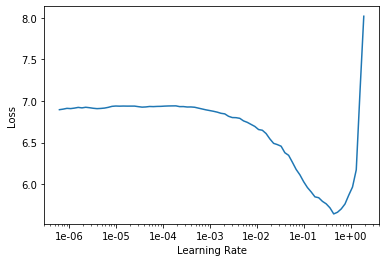

In [17]:
classifier_learn.lr_find()
classifier_learn.recorder.plot()

In [18]:
classifier_learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.896690,1.621608,0.631614,05:23


In [19]:
classifier_learn.save('/content/gdrive/My Drive/first')
classifier_learn.load('/content/gdrive/My Drive/first');
classifier_learn.freeze_to(-2)
classifier_learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.703716,1.440767,0.672213,05:53


In [20]:
model_save_name = 'export2.pkl'
path = F"/content/gdrive/My Drive/{model_save_name}" 

classifier_learn.export(path)
classifier_learn.save("/content/gdrive/My Drive/trained_model2", return_path=True)

PosixPath('/content/gdrive/My Drive/trained_model2.pth')

In [21]:
classifier_learn.save('/content/gdrive/My Drive/second')
classifier_learn.load('/content/gdrive/My Drive/second');
classifier_learn.freeze_to(-3)
classifier_learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.402414,1.289767,0.703678,09:29


In [22]:
classifier_learn.save('/content/gdrive/My Drive/third')
classifier_learn.load('/content/gdrive/My Drive/third');

classifier_learn.unfreeze()
classifier_learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.322893,1.245670,0.713018,13:33
1,1.290537,1.217996,0.719513,13:05


In [23]:
model_save_name = 'export2.pkl'
path = F"/content/gdrive/My Drive/{model_save_name}" 

classifier_learn.export(path)
classifier_learn.save("/content/gdrive/My Drive/trained_model2", return_path=True)

PosixPath('/content/gdrive/My Drive/trained_model2.pth')

In [24]:
classifier_learn.save('/content/gdrive/My Drive/four')
classifier_learn.load('/content/gdrive/My Drive/four');

classifier_learn.unfreeze()
classifier_learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.296381,1.197954,0.722695,14:09
1,1.212174,1.175893,0.729247,12:33


In [25]:
classifier_learn.save('/content/gdrive/My Drive/five')
classifier_learn.load('/content/gdrive/My Drive/five');

classifier_learn.unfreeze()
classifier_learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))C

epoch,train_loss,valid_loss,accuracy,time
0,1.275622,1.158577,0.733683,14:15
1,1.218267,1.126434,0.740215,14:06


In [26]:
classifier_learn.save('/content/gdrive/My Drive/six')
classifier_learn.load('/content/gdrive/My Drive/six');

classifier_learn.unfreeze()
classifier_learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.108862,1.125427,0.744221,13:42
1,1.223203,1.097947,0.752064,14:07


In [27]:
classifier_learn.save('/content/gdrive/My Drive/seven')
classifier_learn.load('/content/gdrive/My Drive/seven');

classifier_learn.unfreeze()
classifier_learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.147449,1.096760,0.752288,14:01
1,1.123156,1.058413,0.761067,13:46


In [28]:
classifier_learn.save('/content/gdrive/My Drive/eight')
classifier_learn.load('/content/gdrive/My Drive/eight');

classifier_learn.unfreeze()
classifier_learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.073956,1.055209,0.761722,13:04
1,0.910178,1.039405,0.771643,12:37


In [29]:
classifier_learn.save('/content/gdrive/My Drive/nine')
classifier_learn.load('/content/gdrive/My Drive/nine');

classifier_learn.unfreeze()
classifier_learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.055485,1.040121,0.770332,12:42
1,0.857888,1.010181,0.780028,12:44


In [30]:
classifier_learn.save('/content/gdrive/My Drive/ten')
classifier_learn.load('/content/gdrive/My Drive/ten');

classifier_learn.unfreeze()
classifier_learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.938707,1.018745,0.777351,14:25
1,0.824112,0.991506,0.788114,12:44


In [31]:
model_save_name = 'export2.pkl'
path = F"/content/gdrive/My Drive/{model_save_name}" 

classifier_learn.export(path)
classifier_learn.save("/content/gdrive/My Drive/trained_model2", return_path=True)

PosixPath('/content/gdrive/My Drive/trained_model2.pth')

In [32]:
classifier_learn.show_results(rows=10)

text,target,prediction
"xxbos "" i do n’t find a lot of positive stories about antidepressants , or i find stories where people are taking the antidepressant the wrong way . \r \n \r \n i wanted to share my experience . a positive one . \r \n \r \n i ’ve had generalized anxiety disorder , xxup severe xxup ocd , and panic disorder for as long as i can",Obsessive Compulsive Disorde,Panic Disorde
"xxbos "" • \t 19 xxmaj apr. 2016 \r\r \n \r\r \n xxmaj began initial dose at xxunk hours . xxmaj felt the medicine working within a ½ hour . xxmaj was in a good mood as i had been taken off of xxmaj warfarin this date . xxmaj before drifting off to sleep , i xxunk at the clock . xxmaj it was approx . xxunk hrs .",Depression,High Cholesterol
"xxbos "" xxmaj my personal experience with suboxone is good so far . i have been on prescribed xxmaj fentanyl xxmaj patch 25 much / 48 hrs . i have dropped to this dose over the last year . ( i also left the old patch on ) . i have been on opiates for 12 years full time prescribed . xxmaj at my highest prescription i was using 180",Opiate Dependence,Opiate Dependence
"xxbos "" xxmaj my personal experience with suboxone is good so far . i have been on prescribed xxmaj fentanyl xxmaj patch 25 much / 48 hrs . i have dropped to this dose over the last year . ( i also left the old patch on ) . i have been on opiates for 12 years full time prescribed . xxmaj at my highest prescription i was using 180",Opiate Dependence,Opiate Dependence
"xxbos "" xxmaj my colonoscopy was booked in for late afternoon on a xxmaj thursday . xxmaj the hospital said to stop eating anything from 1 pm on the xxmaj wednesday and recommended ( giving some detail ) a non fibre diet from xxmaj tuesday evening until xxmaj wednesday noon - avoiding dark drinks and jelly ( like xxunk flavour ) . xxmaj avoid red meat , sausages and pies",Bowel Preparation,Bowel Preparation
"xxbos "" xxmaj holy xxunk xxmaj batman it worked ! xxmaj but boy it was a xxmaj journey lol for 4 days i had n't pooped ! i had already taken laxatives , stool softener , a bucket of prunes , fiber pills , other fiber pills and still no poop over the last 4 days ! xxmaj so i called friend that has xxmaj gastroparesis and asked her what",Constipation,Constipation
"xxbos "" i just started this medicine 3 days ago and i can not express how much of an effect it has had on me already . i just graduated high school and became depressed soon after , severe anxiety where i could n't go out to eat without having to vomit . i also could n't keep focus on anything , especially when trying to talk to people ,",Depression,Depression
"xxbos "" i felt compelled to write a review , as i was on topamax ( or should i say dopamax ? ! ) for about 2 years . i started this medication when i was 21 and was so desperate to find something that would actually help my on - going migraines . xxmaj personally , the side effect symptoms xxup far outweighed the benefits . i started out",Migraine Prevention,Migraine Prevention
"xxbos "" i have dealt with ups and downs , anxiety , social anxiety , depression etc . etc . for years . xxmaj my life overall is normal and i managed the episodes but i always knew they were there and did n't like feeling that way . i am married we have children combine that with everything else and it times it was just too much . xxmaj",Social Anxiety Disorde,Social Anxiety Disorde
"xxbos "" xxmaj yes , this medication works . xxmaj it works very well for chronic anxiety disorder and sudden onsets of severe panic attacks . xxmaj knowing what i know now , i wish with all my being it had never ever been prescribed to me , and without the absurd xxunk dozens of practitioners have portrayed . \r\r \n i 'm 32 and have been prescribed clonazopam",Anxiety,Anxiety


In [0]:
from sklearn import metrics

preds, targets = classifier_learn.get_preds()
predictions = np.argmax(preds, axis=1)
confusion_matrix = metrics.confusion_matrix(targets, predictions)

filename = 'Confusion2.csv'
path = F"/content/gdrive/My Drive/{filename}" 
pd.DataFrame(confusion_matrix).to_csv(path)

In [34]:
diagonal = np.diag(confusion_matrix)
true_positives = sum(diagonal)
total_test_data = np.sum(confusion_matrix, axis=1).sum()
accuracy = (true_positives /total_test_data) * 100

print("Test Accuracy Percentage:", accuracy)

Test Accuracy Percentage: 78.81141787552643
